In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle

In [2]:
# The data is given in the form of .txt files. Here we convert the data into a .csv file
# and save it under the 'train' and 'test' directories for further use. Also the data here is
# arranged according to the subject ID. Therefore to break any correlation that may exists
# between the datapoints, we shuffle the dataset before dividing it into public and private
# datasets to be used in the Neural Network model.
features = []
with open("features.txt") as file:
    for line in file:
        features.append(line.split()[1])

# Renaming duplicate column names
names = []
count = {}
for feature in features:
    if(features.count(feature) > 1):
        names.append(feature)
for name in names:
    count[name] = features.count(name)

for i in range(len(features)):
    if(features[i] in names):
        num = count[features[i]]
        count[features[i]] -= 1;
        features[i] = str(features[i] + str(num))


train_df = pd.read_csv("X_train.txt", delim_whitespace = True,names= features)
train_df['subject_id'] = pd.read_csv("subject_train.txt",header= None)
train_df["activity"] = pd.read_csv("y_train.txt", header = None)
activity = pd.read_csv("y_train.txt", header = None)
label_name = activity.map(lambda x: {1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"}[x])
train_df["activity_name"] = label_name
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [3]:
test_df = pd.read_csv("X_test.txt", delim_whitespace = True, names = features)
test_df['subject_id'] = pd.read_csv("subject_test.txt",header= None)
test_df["activity"] = pd.read_csv("y_test.txt", header = None)
activity = pd.read_csv("y_test.txt", header = None)
label_name = activity.map(lambda x: {1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"}[x])
test_df["activity_name"] = label_name
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [4]:
train_df = shuffle(train_df)
test_df = shuffle(test_df)
train_df.to_csv("train.csv", index = False)
test_df.to_csv("test.csv", index = False)

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df['activity'] -= 1;
test_df['activity'] -= 1;

y_train = train_df['activity']
X_train = train_df.drop(['activity','activity_name','subject_id'],axis=1)
y_test = test_df['activity']
X_test = test_df.drop(['activity','activity_name','subject_id'],axis=1)

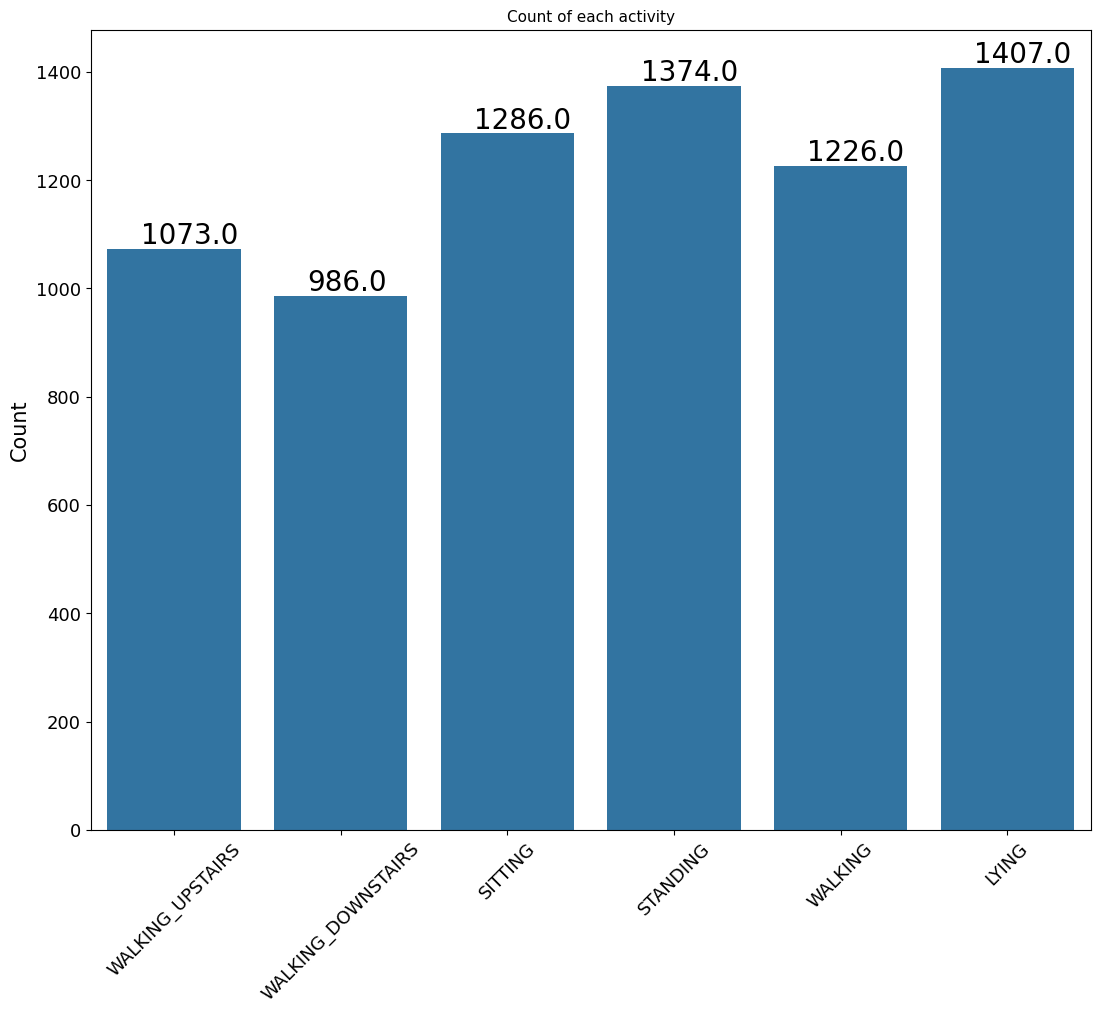

In [6]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 11)
plt.tick_params(labelsize = 10)
sns.countplot(x='activity_name' , data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2 , y = i.get_height() + 10, s = str(i.get_height()), fontsize=20)
plt.xlabel('')
plt.ylabel('Count',fontsize =15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 45)
plt.show()

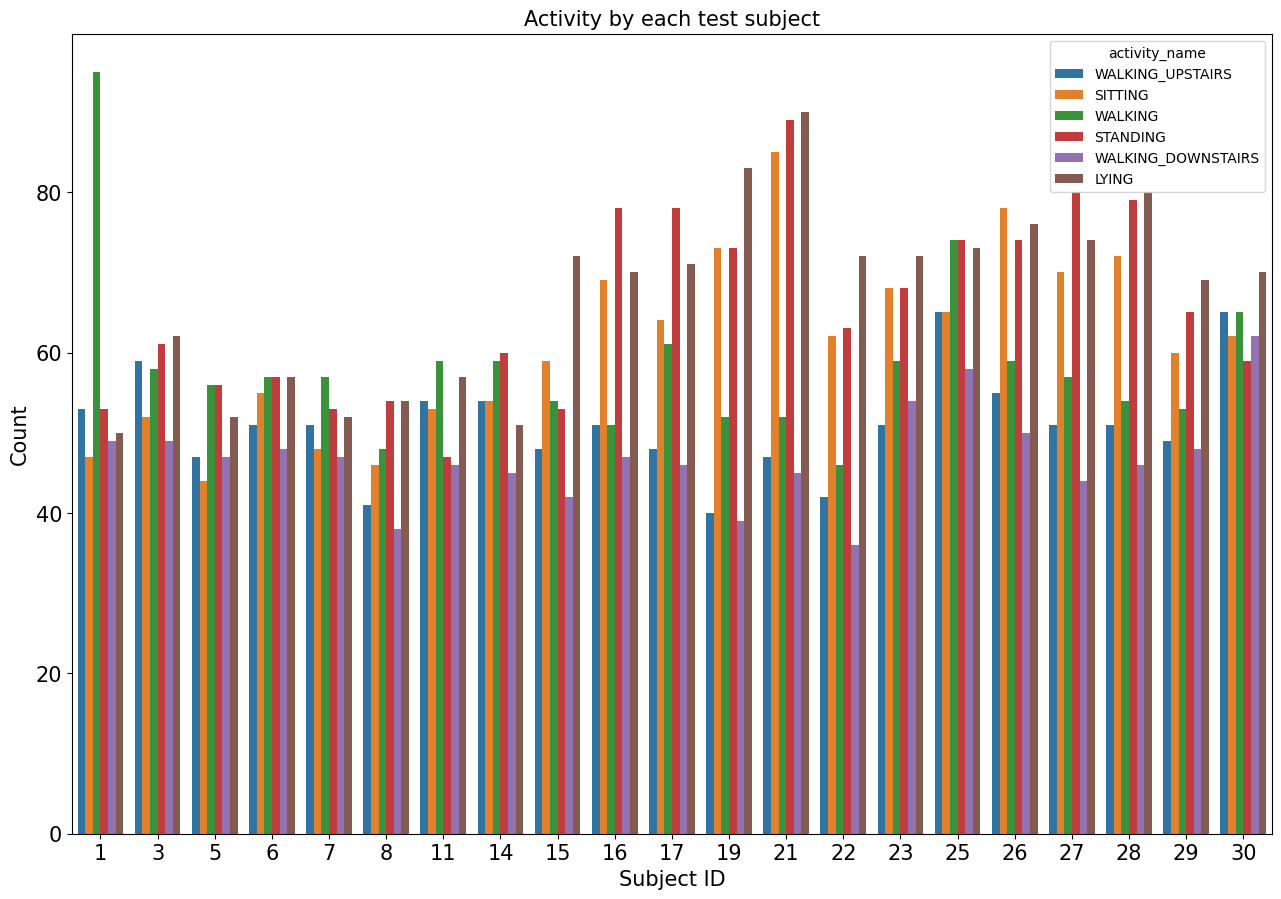

In [7]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = 'subject_id', hue = "activity_name", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

In [8]:
# Variables-
epochs = 25
batch_size = 64
num_classes = 6
fig_size = (9,7)

In [9]:
# FUNCTIONS-
def PREPROCESS(X , y):
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    y = np.array(y)
    return X,y

def CREATE_MODEL(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape,))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    return model

def COMPILE(model):
    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    return model;

def FIT(model,X,y,i):
    history = model.fit(
    X,
    y,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.keras', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )
    return history,model

def PLOT(history,i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_loss,label="Training Loss")
    plt.plot(epochs_range,val_loss,label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()

    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_acc,label="Training accuracy")
    plt.plot(epochs_range,val_acc,label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

def CONFUSION_MATRIX(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatrix, cmap = "Blues", annot = True, fmt = ".0f", xticklabels=labels, yticklabels=labels)
    plt.title("Global Model Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 45)
    plt.show()

def LOAD_MODELS():
    for i in range(1,4):
        model = load_model(f'./model_{i}.keras')
        all_models.append(model)

def APPLY_WEIGHT_FUNCTION(weights):
    avg_model_weights = []
    n_models = len(all_models)
    n_layers = len(all_models[0].get_weights())
    for layer in range(n_layers):
        layer_weights = np.array([model.get_weights()[layer] for model in all_models])
        if len(weights) == n_models: # Check if the number of weights matches the number of models
            avg_layer_weights = np.average(layer_weights, axis=0, weights=weights)
        else:
            avg_layer_weights = np.average(layer_weights, axis=0)  # Fallback to simple average
        avg_model_weights.append(avg_layer_weights)
    return avg_model_weights

In [10]:
# MODEL REPLICA NO.1
X_train_1 = X_train[0:2500]
y_train_1 = y_train[0:2500]

In [11]:
X_train_1, y_train_1 = PREPROCESS(X_train_1,y_train_1);

In [12]:
model_1 = CREATE_MODEL((X_train_1.shape[1],))
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,302 (731.65 KB)

 Trainable params: 187,302 (731.65 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_1 = COMPILE(model_1)
history_1,model_1 = FIT(model_1,X_train_1,y_train_1,1)

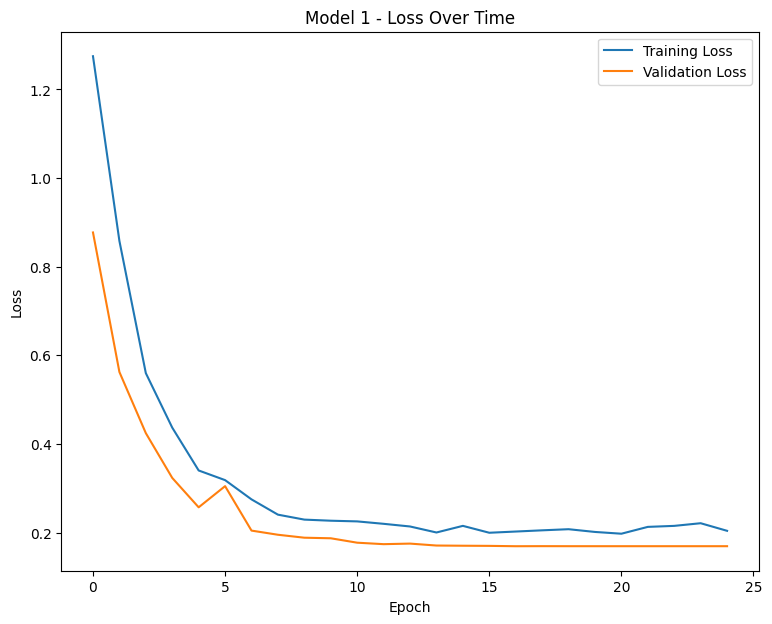

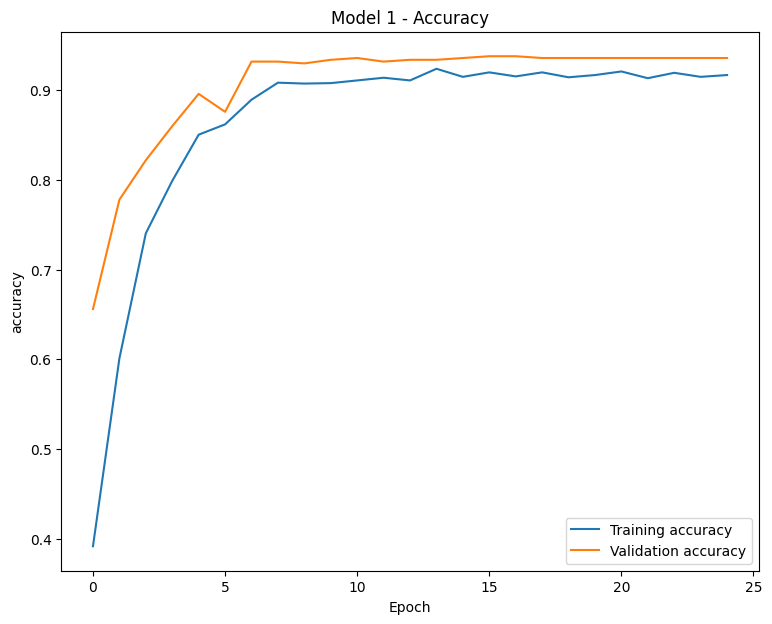

In [14]:
PLOT(history_1,1)

In [15]:
# MODEL REPLICA NO.2
X_train_2 = X_train[2500:5000]
y_train_2 = y_train[2500:5000]

In [16]:
X_train_2, y_train_2 = PREPROCESS(X_train_2,y_train_2)

In [17]:
model_2 = CREATE_MODEL((X_train_2.shape[1],))
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,302 (731.65 KB)

 Trainable params: 187,302 (731.65 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_2 = COMPILE(model_2)
history_2,model_2 = FIT(model_2,X_train_2,y_train_2,2);

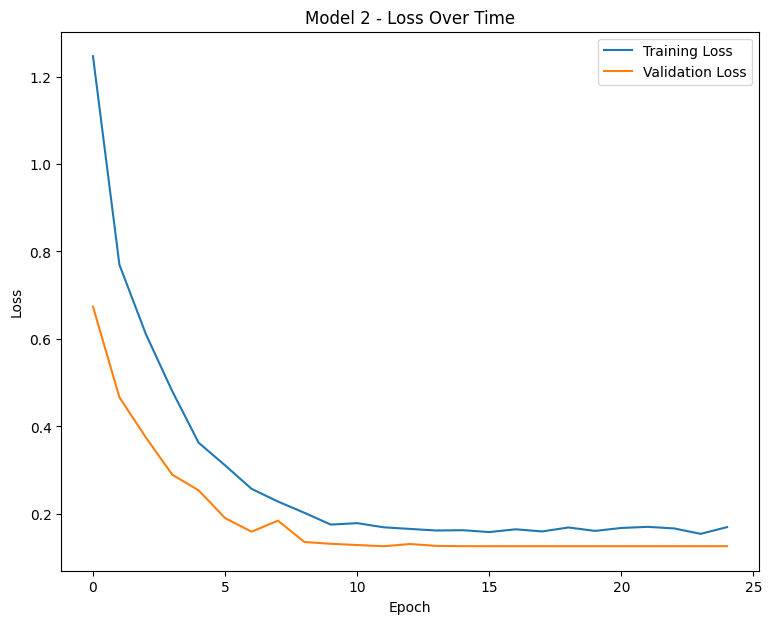

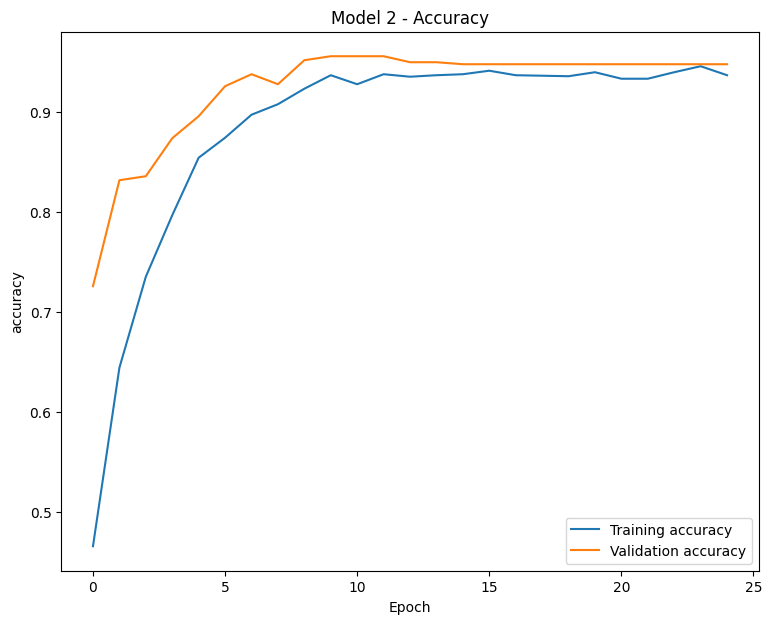

In [19]:
PLOT(history_2,2);

In [20]:
# MODEL REPLICA NO.3
X_train_3 = X_train[5000:-1]
y_train_3 = y_train[5000:-1]

In [21]:
X_train_3, y_train_3 = PREPROCESS(X_train_3,y_train_3)

In [22]:
model_3 = CREATE_MODEL((X_train_3.shape[1],))
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,302 (731.65 KB)

 Trainable params: 187,302 (731.65 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_3 = COMPILE(model_3);
history_3, model_3 = FIT(model_3,X_train_3,y_train_3,3)

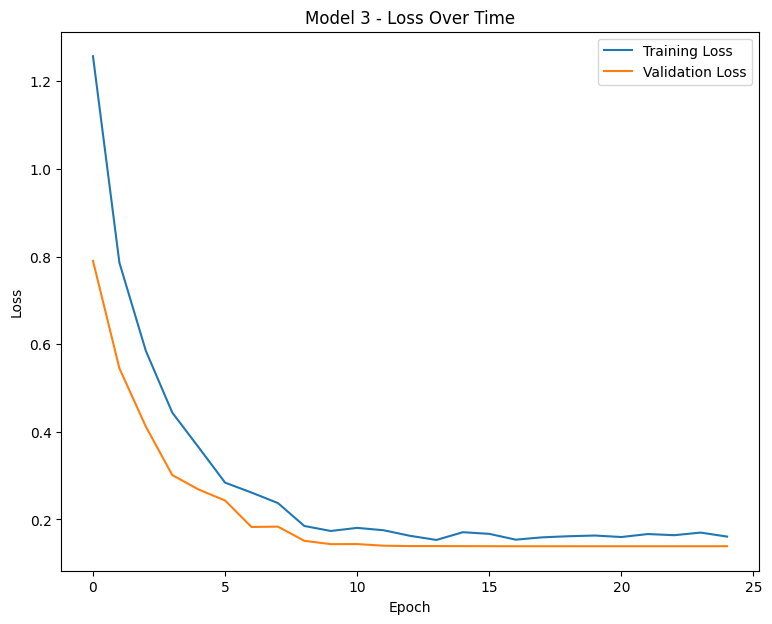

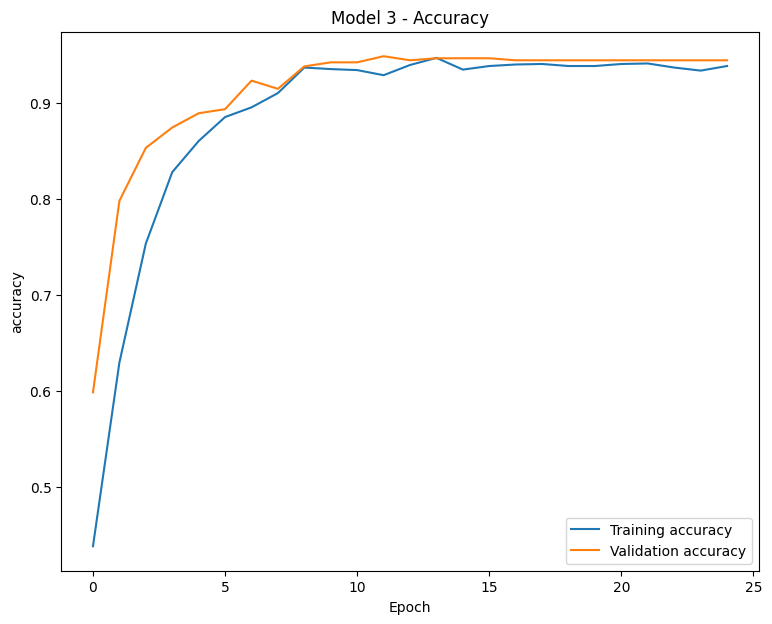

In [24]:
PLOT(history_3,3)

In [25]:
X_test, y_test = PREPROCESS(X_test, y_test)

In [26]:
model_g = CREATE_MODEL((X_test.shape[1],))
model_g.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │         143,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,302 (731.65 KB)

 Trainable params: 187,302 (731.65 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Initialize an empty list to store the models
all_models = []

# Function to load the models
def LOAD_MODELS():
    for i in range(1, 4):
        model = load_model(f'./model_{i}.keras')
        all_models.append(model)

# Call the function to load the models
LOAD_MODELS()

In [28]:
weights = [max(history_1.history['accuracy']), max(history_2.history['accuracy']), max(history_3.history['accuracy'])]
if len(weights) >= 3:
    x = max(weights)
    idx = weights.index(x)
    weights[idx] = 1
    x = min(weights)
    idx = weights.index(x)
    weights[idx] = 0.02
    for i in range(3):
        if weights[i] != 1 and weights[i] != 0.02:
            weights[i] = 0.03
            break
avg_model_weights = APPLY_WEIGHT_FUNCTION(weights)

In [29]:
model_g.set_weights(avg_model_weights)
model_g = COMPILE(model_g)
_ , accuracy = model_g.evaluate(X_test,y_test,verbose=0)
print(f"Global Model Accuracy: {round(accuracy*100,2)}%")

Global Model Accuracy: 88.06%


In [30]:
y_pred = model_g.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


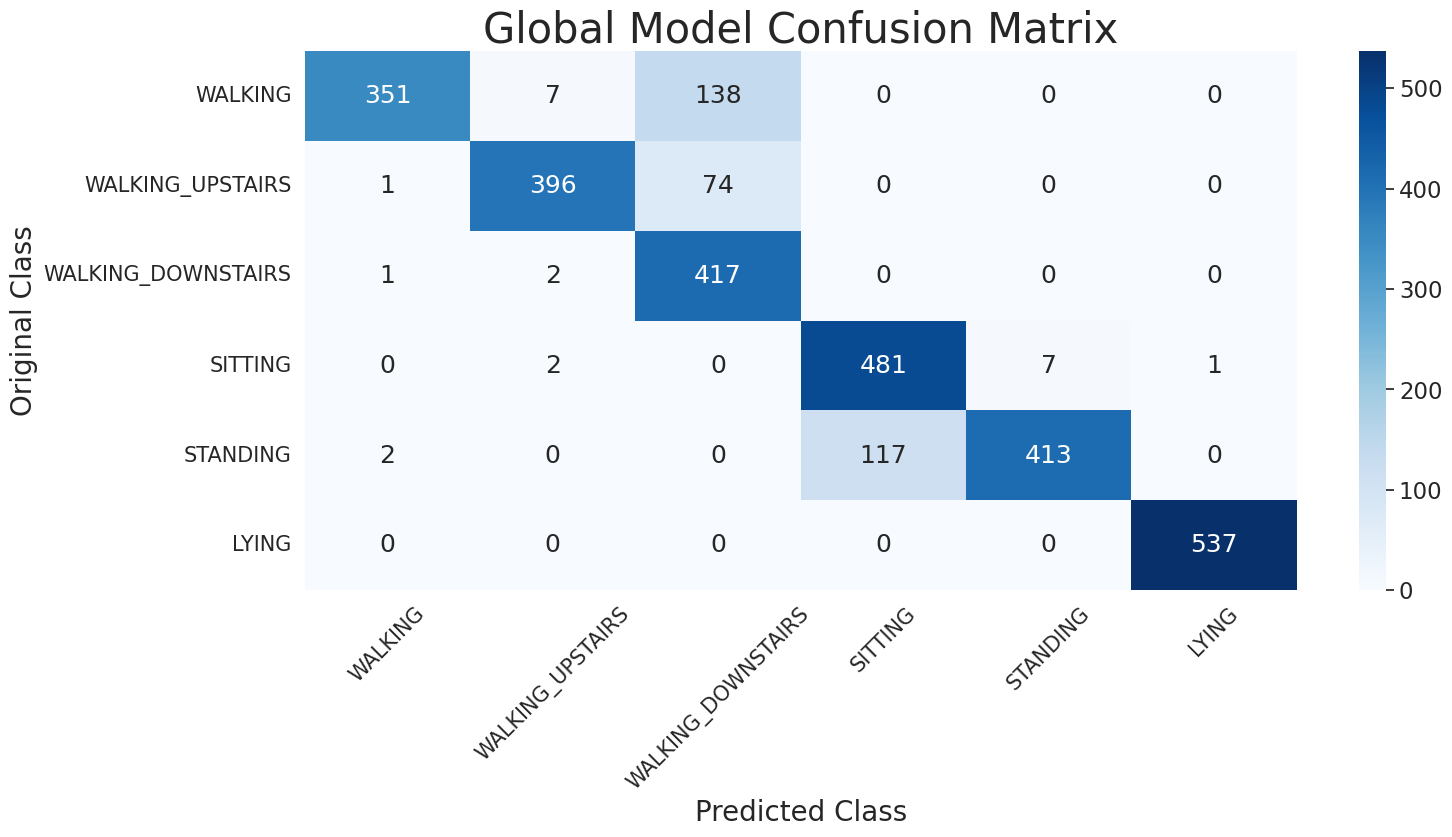

In [31]:
CONFUSION_MATRIX(y_test,y_pred)

In [32]:
global_model = tf.keras.models.clone_model(all_models[0])

# Step 5: Set the averaged weights to the global model
global_model.set_weights(avg_model_weights)

# Step 7: Save the global model as a .keras file
global_model.save('./global_model.keras')

In [33]:
data = pd.read_csv('train.csv')  # Replace with actual filename

# Assuming X are features and y are labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Preprocess the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = np.array(y)

Training Model 1
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4775 - loss: 1.1554 - val_accuracy: 0.8287 - val_loss: 0.4015 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8275 - loss: 0.4052 - val_accuracy: 0.9191 - val_loss: 0.2059 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9012 - loss: 0.2547 - val_accuracy: 0.9449 - val_loss: 0.1453 - learning_rate: 0.0010
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9310 - loss: 0.1770 - val_accuracy: 0.9232 - val_loss: 0.1849 - learning_rate: 0.0010
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9319 - loss: 0.1750 - val_accuracy: 0.9504 - val_loss: 0.1175 - learning_rate: 1.0000e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9591 - loss: 0.1208 - val_accuracy: 0.9524 - val_loss: 0.1101 - learning_rate: 1.0000e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9532 

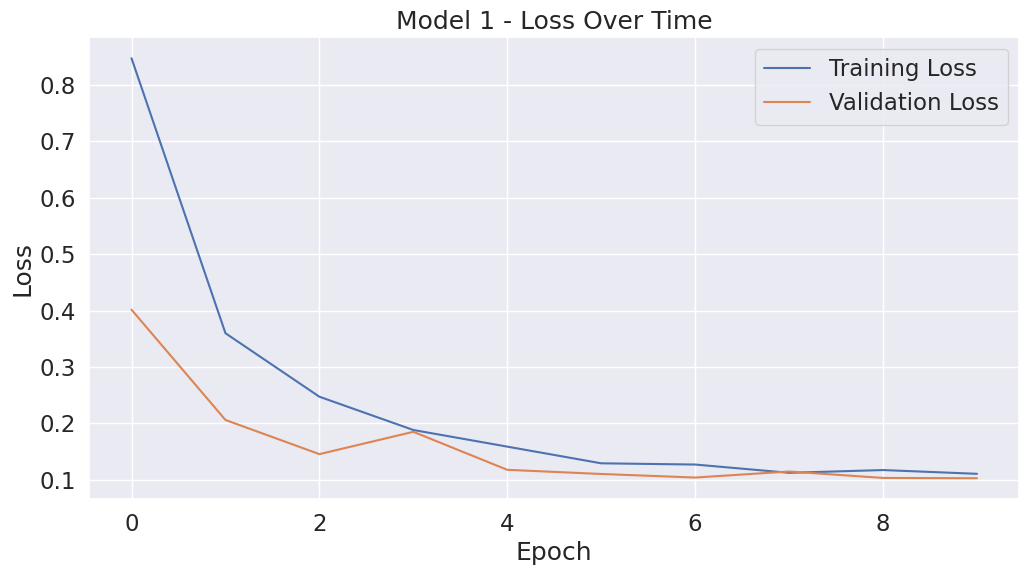

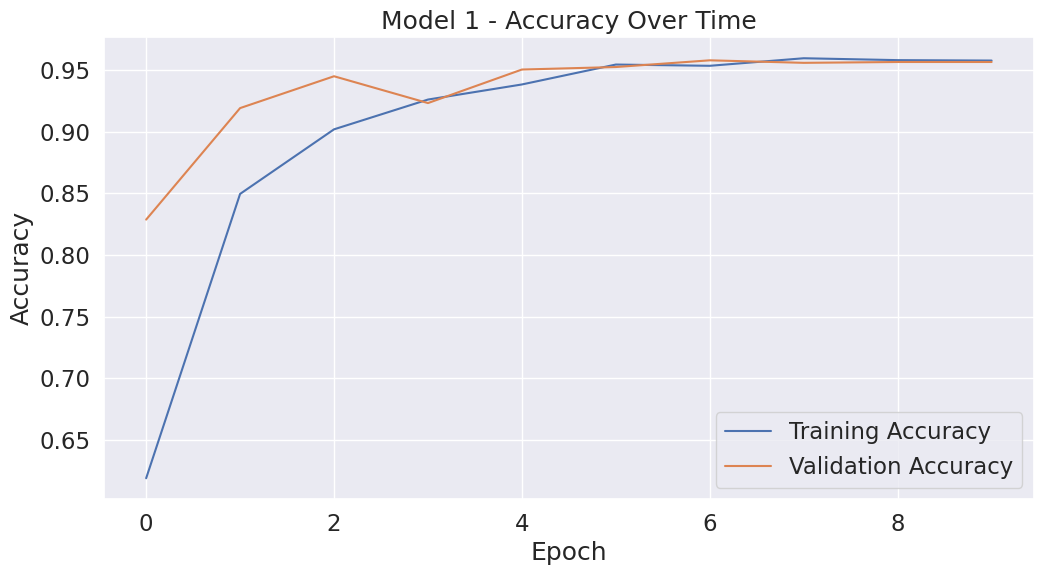

Training Model 2
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4639 - loss: 1.2177 - val_accuracy: 0.7709 - val_loss: 0.4669 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7754 - loss: 0.4855 - val_accuracy: 0.8708 - val_loss: 0.3011 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8687 - loss: 0.3178 - val_accuracy: 0.9341 - val_loss: 0.1540 - learning_rate: 0.0010
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9056 - loss: 0.2384 - val_accuracy: 0.9245 - val_loss: 0.1821 - learning_rate: 0.0010
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9441 - loss: 0.1522 - val_accuracy: 0.9449 - val_loss: 0.1250 - learning_rate: 1.0000e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9410 - loss: 0.1525 - val_accuracy: 0.9456 - val_loss: 0.1259 - learning_rate: 1.0000e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9578 - los

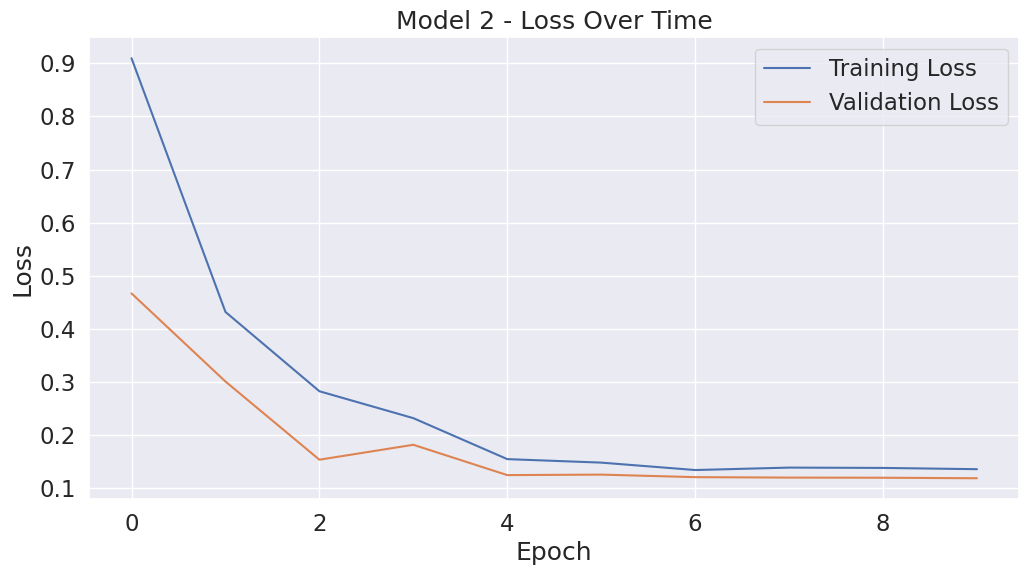

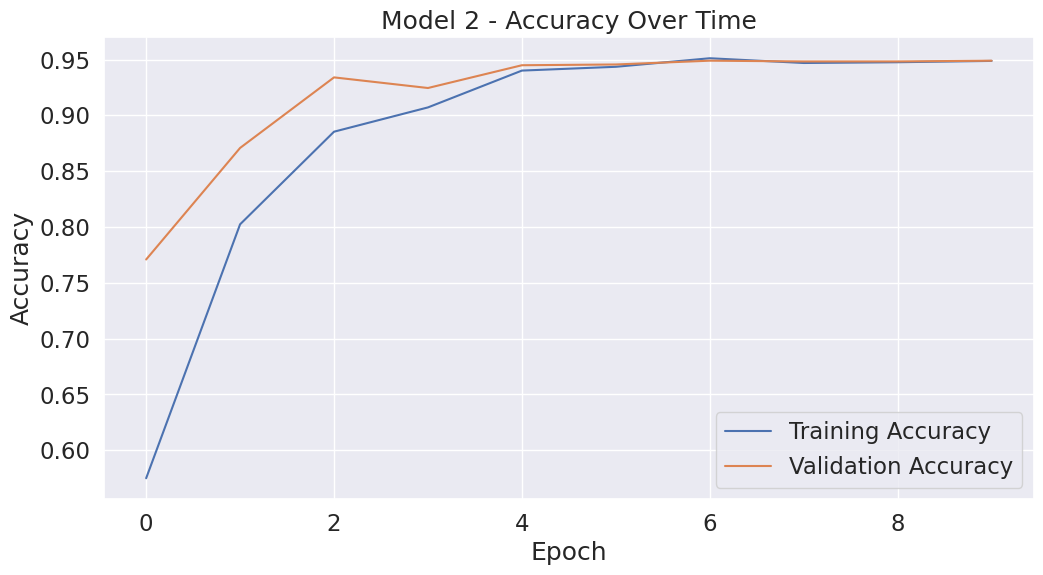

Training Model 3
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4564 - loss: 1.2177 - val_accuracy: 0.7920 - val_loss: 0.4463 - learning_rate: 0.0010
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7968 - loss: 0.4470 - val_accuracy: 0.9021 - val_loss: 0.2371 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8850 - loss: 0.2865 - val_accuracy: 0.9361 - val_loss: 0.1552 - learning_rate: 0.0010
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9168 - loss: 0.2061 - val_accuracy: 0.9415 - val_loss: 0.1482 - learning_rate: 0.0010
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9318 - loss: 0.1825 - val_accuracy: 0.9524 - val_loss: 0.1134 - learning_rate: 0.0010
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9532 - loss: 0.1322 - val_accuracy: 0.9415 - val_loss: 0.1528 - learning_rate: 0.0010
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9629 - loss: 0.098

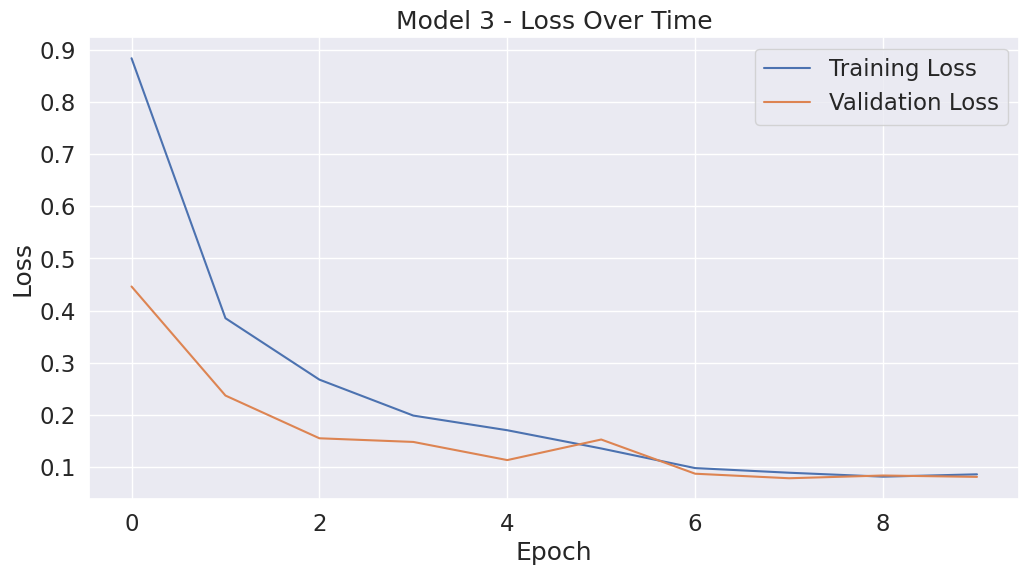

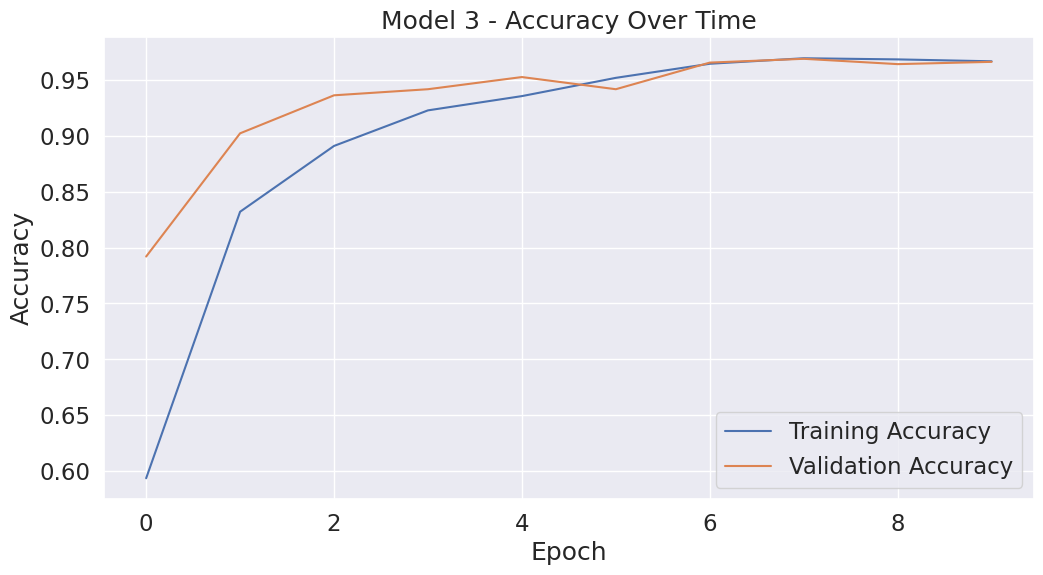

In [34]:
# Set some constants
epochs = 10
batch_size = 64
fig_size = (12, 6)
all_models = []

# Step 1: Preprocessing Function
def PREPROCESS(X, y):
    # Ensure input features are scaled between 0 and 1
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Convert labels (such as 'WALKING') to integers
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    return X, y, label_encoder

# Step 2: Create Model Function
def CREATE_MODEL(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification
    return model

# Step 3: Compile Model Function
def COMPILE(model):
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 4: Fit Model Function
def FIT(model, X, y, i):
    history = model.fit(
        X,
        y,
        validation_split=0.2,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[
            tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.keras', save_best_only=True),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=1
            )
        ],
        verbose=1
    )
    return history, model

# Step 5: Plotting Function for Loss and Accuracy
def PLOT(history, i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Plot loss
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range, train_loss, label="Training Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()

    # Plot accuracy
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range, train_acc, label="Training Accuracy")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy Over Time")
    plt.show()

# Step 6: Confusion Matrix Plotting Function
def CONFUSION_MATRIX(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16, 7))
    sns.heatmap(confusionMatrix, cmap="Blues", annot=True, fmt=".0f", xticklabels=labels, yticklabels=labels)
    plt.title("Global Model Confusion Matrix", fontsize=30)
    plt.xlabel('Predicted Class', fontsize=20)
    plt.ylabel('Original Class', fontsize=20)
    plt.tick_params(labelsize=15)
    plt.xticks(rotation=45)
    plt.show()

# Step 7: Load Models
def LOAD_MODELS():
    for i in range(1, 4):
        model = tf.keras.models.load_model(f'./model_{i}.keras')
        all_models.append(model)

# Step 8: Apply Weight Aggregation Function for Federated Learning
def APPLY_WEIGHT_FUNCTION(weights):
    avg_model_weights = []
    n_models = len(all_models)
    n_layers = len(all_models[0].get_weights())

    for layer in range(n_layers):
        layer_weights = np.array([model.get_weights()[layer] for model in all_models])
        if len(weights) == n_models:
            avg_layer_weights = np.average(layer_weights, axis=0, weights=weights)
        else:
            avg_layer_weights = np.average(layer_weights, axis=0)  # Simple average
        avg_model_weights.append(avg_layer_weights)

    return avg_model_weights

# Step 9: Train the model (Main Execution)
# Assuming you have your training data in X_train and y_train

# Preprocess the data (e.g., HAR dataset)
X_train, y_train, label_encoder = PREPROCESS(X_train, y_train)

# Get input shape and number of classes
input_shape = (X_train.shape[1],)  # Number of features
num_classes = len(np.unique(y_train))

for i in range(1, 4):
    print(f"Training Model {i}")

    # Create, compile and fit the model
    model = CREATE_MODEL(input_shape=input_shape, num_classes=num_classes)
    model = COMPILE(model)
    history, model = FIT(model, X_train, y_train, i)

    # Append the model to the list of models
    all_models.append(model)

    # Plot loss and accuracy for the model
    PLOT(history, i)

# Step 10: Apply Weight Aggregation for Federated Learning
# Assuming you want to apply federated learning weights
federated_weights = APPLY_WEIGHT_FUNCTION(weights=[0.33, 0.33, 0.34])

# Load any model to apply the aggregated weights
model.set_weights(federated_weights)

In [35]:
for i, model in enumerate(all_models):
    print(f"Model {i} weights length: {len(model.get_weights())}")

# Check length of weights in APPLY_WEIGHT_FUNCTION
print(f"Length of weights list: {len(weights)}")

Model 0 weights length: 10
Model 1 weights length: 10
Model 2 weights length: 10
Length of weights list: 3


In [36]:
# Print the shapes of weights in each model
for i, model in enumerate(all_models):
    for j, weight in enumerate(model.get_weights()):
        print(f"Model {i} Layer {j} weight shape: {weight.shape}")

Model 0 Layer 0 weight shape: (561, 256)
Model 0 Layer 1 weight shape: (256,)
Model 0 Layer 2 weight shape: (256, 128)
Model 0 Layer 3 weight shape: (128,)
Model 0 Layer 4 weight shape: (128, 64)
Model 0 Layer 5 weight shape: (64,)
Model 0 Layer 6 weight shape: (64, 32)
Model 0 Layer 7 weight shape: (32,)
Model 0 Layer 8 weight shape: (32, 6)
Model 0 Layer 9 weight shape: (6,)
Model 1 Layer 0 weight shape: (561, 256)
Model 1 Layer 1 weight shape: (256,)
Model 1 Layer 2 weight shape: (256, 128)
Model 1 Layer 3 weight shape: (128,)
Model 1 Layer 4 weight shape: (128, 64)
Model 1 Layer 5 weight shape: (64,)
Model 1 Layer 6 weight shape: (64, 32)
Model 1 Layer 7 weight shape: (32,)
Model 1 Layer 8 weight shape: (32, 6)
Model 1 Layer 9 weight shape: (6,)
Model 2 Layer 0 weight shape: (561, 256)
Model 2 Layer 1 weight shape: (256,)
Model 2 Layer 2 weight shape: (256, 128)
Model 2 Layer 3 weight shape: (128,)
Model 2 Layer 4 weight shape: (128, 64)
Model 2 Layer 5 weight shape: (64,)
Model 2 

In [37]:
import numpy as np

def resize_weights(weight, target_shape):
    current_shape = weight.shape
    # Check if we need to truncate or pad
    if current_shape[0] < target_shape[0]:
        # Padding
        padding_size = target_shape[0] - current_shape[0]
        padded_weight = np.pad(weight, ((0, padding_size), (0, 0)), mode='constant')
    elif current_shape[0] > target_shape[0]:
        # Truncating
        padded_weight = weight[:target_shape[0], :]
    else:
        # Shape is already correct
        padded_weight = weight
    return padded_weight

def APPLY_WEIGHT_FUNCTION(weights, target_shapes):
    avg_model_weights = []
    n_models = len(all_models)
    n_layers = len(all_models[0].get_weights())

    for layer in range(n_layers):
        layer_weights = np.array([model.get_weights()[layer] for model in all_models])

        # Resize weights if needed
        if layer < len(target_shapes):
            target_shape = target_shapes[layer]
            layer_weights_resized = [resize_weights(w, target_shape) for w in layer_weights]
            avg_layer_weights = np.average(layer_weights_resized, axis=0, weights=weights)
        else:
            avg_layer_weights = np.average(layer_weights, axis=0)  # Fallback to simple average

        avg_model_weights.append(avg_layer_weights)
    return avg_model_weights


In [38]:
# Target shapes for each layer based on the global model
target_shapes = [
    (563, 256),  # Layer 0
    (256,),      # Layer 1
    (256, 128),  # Layer 2
    (128,),      # Layer 3
    (128, 64),   # Layer 4
    (64,),       # Layer 5
    (64, 32),    # Layer 6
    (32,),       # Layer 7
    (32, 6),     # Layer 8
    (6,)         # Layer 9
]

# Example weights for each model
weights = [0.4, 0.35, 0.25]

# Compute global model weights
global_weights = APPLY_WEIGHT_FUNCTION(weights, target_shapes)

# Create a new model
input_shape = (X.shape[1],)
num_classes = len(np.unique(y))  # Assuming y contains labels for classification
global_model = CREATE_MODEL(input_shape=input_shape, num_classes=num_classes)

# Set the averaged weights to the global model
global_model.set_weights(global_weights)

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the generator
def build_generator():
    model = models.Sequential([
        layers.Dense(128, input_dim=100, activation='relu'),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        layers.Dense(X.shape[1], activation='tanh')  # Output matches input shape
    ])
    return model

# Build the discriminator
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, input_dim=X.shape[1], activation='relu'),
        layers.LeakyReLU(0.2),
        layers.Dense(1, activation='sigmoid')  # Output shape should be (batch_size, 1)
    ])
    return model

# Train the GAN
def train_gan(generator, discriminator, epochs, batch_size, real_data):
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    gan_input = layers.Input(shape=(100,))
    generated_data = generator(gan_input)
    discriminator.trainable = False
    gan_output = discriminator(generated_data)

    gan_model = models.Model(gan_input, gan_output)
    gan_model.compile(loss='binary_crossentropy', optimizer='adam')

    for epoch in range(epochs):
        # Training Discriminator
        idx = np.random.randint(0, real_data.shape[0], batch_size)
        real_samples = real_data[idx]
        real_labels = np.ones((batch_size, 1))  # Real labels
        fake_labels = np.zeros((batch_size, 1))  # Fake labels

        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_samples = generator.predict(noise)

        # Train discriminator on real samples
        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        # Train discriminator on fake samples
        d_loss_fake = discriminator.train_on_batch(generated_samples, fake_labels)

        # Training GAN
        noise = np.random.normal(0, 1, (batch_size, 100))
        gan_labels = np.ones((batch_size, 1))  # Labels for GAN training
        g_loss = gan_model.train_on_batch(noise, gan_labels)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch} | D Loss Real: {d_loss_real[0]} | D Loss Fake: {d_loss_fake[0]} | G Loss: {g_loss[0]}")

# Initialize and train GAN
generator = build_generator()
discriminator = build_discriminator()
train_gan(generator, discriminator, epochs=1000, batch_size=64, real_data=X)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 | D Loss Real: 0.48696738481521606 | D Loss Fake: 0.6698416471481323 | G Loss: 0.6698416471481323
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━

In [40]:
# Step 8: Generate synthetic data from GAN
num_samples = 5000
noise = np.random.normal(0, 1, (num_samples, 100))
synthetic_data = generator.predict(noise)

# Augment the dataset
X_augmented = np.vstack([X, synthetic_data])
y_augmented = np.hstack([y, np.random.randint(0, num_classes, num_samples)])


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Define function to create the model
def CREATE_MODEL(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer for classification
    ])
    return model

# Define the number of classes based on your labels
num_classes = 7  # Update this to the correct number of classes in your dataset

# Example data (Replace these with your actual data)
X_combined = np.random.rand(12352, 563)  # Dummy data
y_combined = np.random.randint(0, num_classes, 12352)  # Dummy labels

# One-hot encode `y_combined` with the correct number of classes
y_combined_encoded = to_categorical(y_combined, num_classes=num_classes)

# Ensure data consistency
X_combined = np.array(X_combined, dtype=np.float32)
y_combined_encoded = np.array(y_combined_encoded, dtype=np.float32)

# Create and compile the model
global_model = CREATE_MODEL(input_shape=(563,), num_classes=num_classes)
global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the global model
global_model.fit(X_combined, y_combined_encoded, epochs=10, batch_size=64)


Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1346 - loss: 1.9595
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1364 - loss: 1.9473
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1465 - loss: 1.9469
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1409 - loss: 1.9460
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1431 - loss: 1.9456
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1469 - loss: 1.9464
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1486 - loss: 1.9454
Epoch 8/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1467 - loss: 1.9459
Epoch 9/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1504 - loss: 1.9454
Epoch 10/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1426 - loss: 1.9460


In [53]:
# Save the trained global model in the native Keras format
global_model.save('global_model_.keras')


In [55]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('global_model_.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [56]:
from tensorflow.keras.utils import to_categorical

# Convert y_test to one-hot encoding if necessary
num_classes = 7  # Set this to the number of classes in your problem
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1656 - loss: 1.9449
Test accuracy: 0.16627077758312225
